In [26]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

In [27]:
def init_state(grid_size=10):
    """
    This Function intalizes the state for random configuration
    """
    spins = np.random.choice([-1, 1], size=(grid_size, grid_size))  # random initial configuration of spins
    return spins

In [28]:
def calc_energy(spins):
    """
    Compute the Energy of the given spin configuration
    """
    energy = 0.0
    for i in range(grid_size):
        for j in range(grid_size):
            energy-= spins[i, j] * (spins[i, (j+1)%grid_size] + spins[(i+1)%grid_size, j])
    return energy

In [29]:
def calc_magnetization(spins):
    """
    Calculates the Magnetization of given configuration
    """
    return np.sum(spins)

In [37]:
def perform_simulation(n_steps, temperature, spins, grid_size):
    """
    Run the Simulation
    """
    # Run the Metropolis-Hastings algorithm
    for step in range(n_steps):
        # Choose a random spin
        i = np.random.randint(grid_size)
        j = np.random.randint(grid_size)
        # Calculate the energy of the current configuration
        E_old = calc_energy(spins)
        # Flip the chosen spin
        spins[i, j] = -spins[i, j]
        # Calculate the energy of the new configuration
        E_new = calc_energy(spins)
        # Accept or reject the flip
        if E_new >= E_old:
            # Calculate acceptance probability
            en = E_new - E_old
            p = np.exp(-en / temperature)

            # Generate a random number and accept the flip if p > r
            r = np.random.rand()
            if r > p:
                spins[i, j] = -spins[i, j]
    return spins

In [43]:
n_steps=1000
temperature=1
grid_size=10
init_config=init_state(grid_size=grid_size)

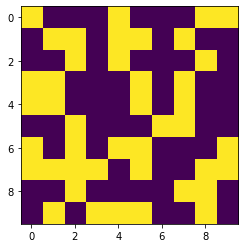

In [44]:
plt.imshow(init_config)
plt.savefig('initial.png')
plt.show()

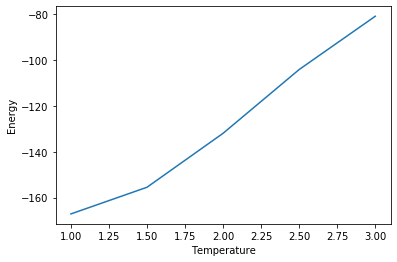

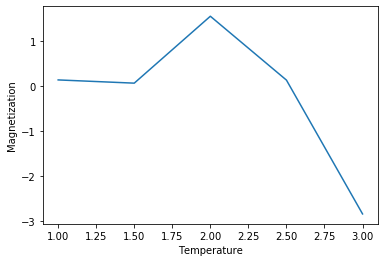

In [45]:
# Define the grid size and the number of steps
grid_size = 10
n_steps = 1000

# Define the range of temperatures to simulate
temperature_range = np.linspace(1, 3, 5)

# Initialize lists to store the energy and magnetization
energy_list = []
magnetization_list = []

# Run the simulation for each temperature
for temperature in temperature_range:
    energy = 0.0
    magnetization = 0.0
    for i in range(n_steps):
        spins = init_state(grid_size)
        spins = perform_simulation(n_steps, temperature, spins, grid_size)
        energy += calc_energy(spins)
        magnetization += calc_magnetization(spins)
    energy_list.append(energy / n_steps)
    magnetization_list.append(magnetization / n_steps)

# Plot the energy and magnetization as a function of temperature
plt.plot(temperature_range, energy_list)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.show()

plt.plot(temperature_range, magnetization_list)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

In [51]:
# Define the grid size and the number of steps
import matplotlib.gridspec as gridspec
grid_size = 10
n_steps = 1000

# Define the temperature
temperature = 2

# Initialize a list to store the spin configurations at different times
spins_list = []

# Create a counter variable
count = 0

# Run the simulation
spins = init_state(grid_size)
for step in range(n_steps):
    spins = perform_simulation(n_steps, temperature, spins, grid_size)
    count += 1
    if count % 50 == 0:
        spins_list.append(spins.copy())

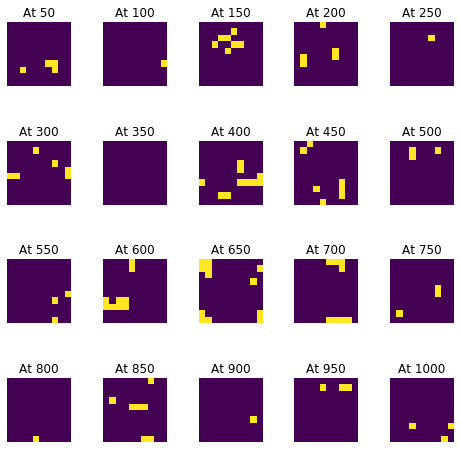

In [72]:
# Set the number of rows and columns for the grid
n_rows = 4
n_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,8))

# Flatten the axes array
axes = axes.ravel()

# Iterate over the spin configurations
for i, spins in enumerate(spins_list):
    axes[i].imshow(spins)
    axes[i].set_title(f'At {(i*50)+50}')
    # remove the axis labels and ticks
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

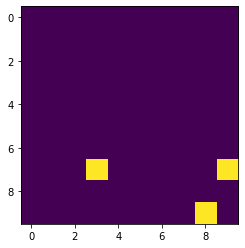

In [73]:
plt.imshow(spins)